In [350]:
import numpy as np
import pandas as pd

# Importing data

In [351]:
ls


insurance.csv  insurance.ipynb  README.md  requierments.txt


In [352]:
insurance = pd.read_csv('insurance.csv', sep=';')
insurance.head()

/tmp/ipykernel_6897/1101451641.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  insurance = pd.read_csv('insurance.csv', sep=';')


,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


# Data preparation

In [353]:
insurance.columns

Index(['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
       'Date_birth', 'Date_driving_licence', 'Distribution_channel',
       'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Year_matriculation', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')

In [354]:
# columns_to_drops = ['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence','Distribution_channel', 'Policies_in_force','Max_policies', 'Max_products','Date_lapse', 'Lapse', 'Payment', 'Premium', 'Cost_claims_year',
#        'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Area', 'Second_driver', 'Year_matriculation', 'Length'   ]

columns_to_drops = ['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence','Distribution_channel', 'Policies_in_force','Max_policies', 'Max_products','Date_lapse', 'Lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Area', 'Second_driver', 'Year_matriculation', 'Length'  ,'Type_risk' ]

In [355]:
insurance = insurance.drop(columns= columns_to_drops, axis=1)

In [356]:
insurance.head()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
0,4,80,599,7068.0,0,P,190
1,4,80,599,7068.0,0,P,190
2,4,80,599,7068.0,0,P,190
3,4,80,599,7068.0,0,P,190
4,4,80,599,7068.0,0,P,190


# Data Information

In [357]:
insurance.shape

(105555, 7)

In [358]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Seniority          105555 non-null  int64  
 1   Power              105555 non-null  int64  
 2   Cylinder_capacity  105555 non-null  int64  
 3   Value_vehicle      105555 non-null  float64
 4   N_doors            105555 non-null  int64  
 5   Type_fuel          103791 non-null  object 
 6   Weight             105555 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.6+ MB


In [359]:
insurance.isnull().sum()

Seniority               0
Power                   0
Cylinder_capacity       0
Value_vehicle           0
N_doors                 0
Type_fuel            1764
Weight                  0
dtype: int64

In [360]:
insurance.duplicated().sum()

64937

In [361]:
insurance.describe()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Weight
count,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000,105555.000000
mean,6.696604,92.682611,1617.759367,18413.657243,4.067898,1191.262422
std,6.263911,37.012645,604.697382,9135.074235,1.511839,458.081834
min,1.000000,0.000000,49.000000,270.460000,0.000000,43.000000
25%,3.000000,75.000000,1390.000000,13127.210000,3.000000,1043.000000
50%,4.000000,90.000000,1598.000000,17608.770000,5.000000,1205.000000
75%,9.000000,110.000000,1910.000000,22595.000000,5.000000,1388.000000
max,40.000000,580.000000,7480.000000,220675.800000,6.000000,7300.000000


# Data Preprocessing

## drop duplicated data

In [362]:
insurance.drop_duplicates(inplace=True)

In [363]:
insurance.shape

(40618, 7)

In [364]:
insurance.duplicated().sum()

0

## drop if exist  null data

In [365]:
insurance = insurance.dropna()

In [366]:
insurance.shape

(39802, 7)

In [367]:
insurance.isnull().sum()

Seniority            0
Power                0
Cylinder_capacity    0
Value_vehicle        0
N_doors              0
Type_fuel            0
Weight               0
dtype: int64

In [368]:
insurance.shape

(39802, 7)

# Encoding

In [369]:
insurance_type = {
    'P':1,
    'D':2
}


In [370]:
insurance['Type_fuel'] = insurance['Type_fuel'].map(insurance_type)

In [371]:
insurance.head()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight
0,4,80,599,7068.00,0,1,190
6,15,85,1229,16030.00,5,1,1105
10,3,6,74,1261.82,0,1,87
13,3,6,244,3000.00,0,1,92
15,13,87,1598,9927.00,4,1,1055


# Exploring DATA

In [372]:
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
# X = insurance['Type_risk']
# Y = insurance['Power']
# plt.scatter(X,Y,marker=',',color = 'red')

<Axes: >

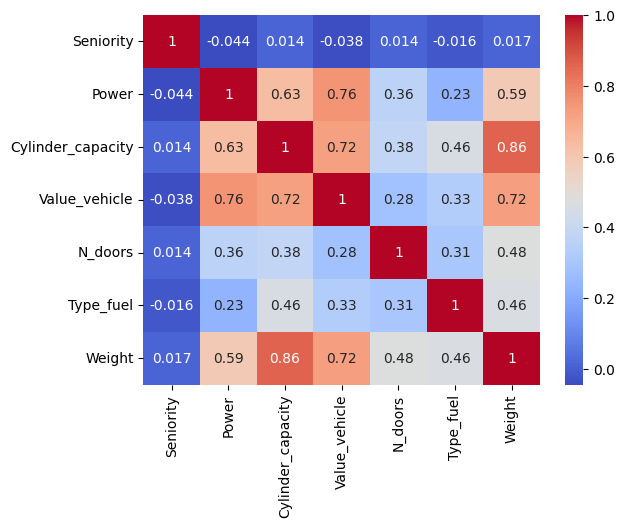

In [374]:
corr_feature = insurance.corr()
sns.heatmap(corr_feature,annot=True,cbar=True, cmap='coolwarm')

/tmp/ipykernel_6897/189941368.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Value_vehicle'])


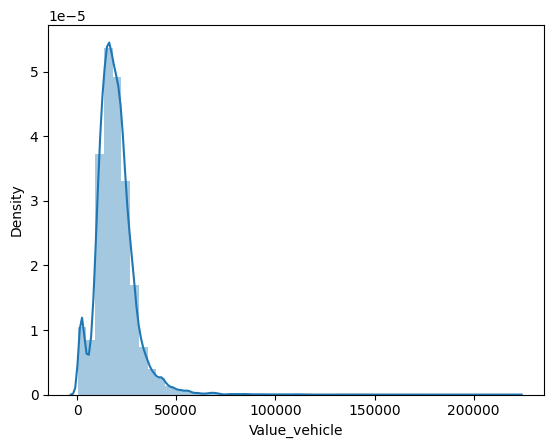

In [375]:
sns.distplot(insurance['Value_vehicle'])
plt.show()

/tmp/ipykernel_6897/1496202371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Power'])


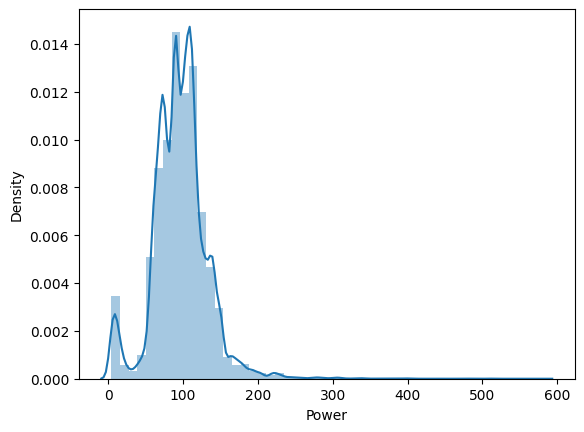

In [376]:
sns.distplot(insurance['Power'])
plt.show()

/tmp/ipykernel_6897/3666333232.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['Seniority'])


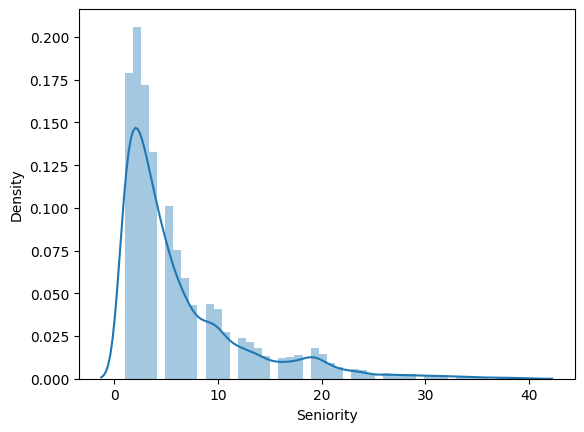

In [377]:
sns.distplot(insurance['Seniority'])
plt.show()

# Unsupervised learning for data clustering

## Data scaling

In [378]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [379]:
datascaler = StandardScaler()
data_numeric= insurance[['Seniority','Power', 'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Weight']]

data_insurance_scaled = datascaler.fit_transform(data_numeric)


In [380]:
data_insurance_scaled

array([[-0.38193802, -0.44639272, -1.79976203, -1.26693174, -2.89448093,
        -2.42389762],
       [ 1.37274054, -0.31067499, -0.71845064, -0.33287389,  0.62300573,
        -0.26760288],
       [-0.54145425, -2.45501502, -2.70085486, -1.87207657, -2.89448093,
        -2.66662807],
       ...,
       [-0.86048671, -0.58211044,  0.54994479,  0.26452395,  0.62300573,
         0.8140794 ],
       [-0.86048671,  0.36791362,  0.59971944,  0.53114525,  0.62300573,
         0.61612447],
       [-0.86048671,  1.18221996,  0.54994479,  1.47750156,  0.62300573,
         1.13222125]])

## determine cluster numbers

In [395]:
from sklearn.cluster import KMeans

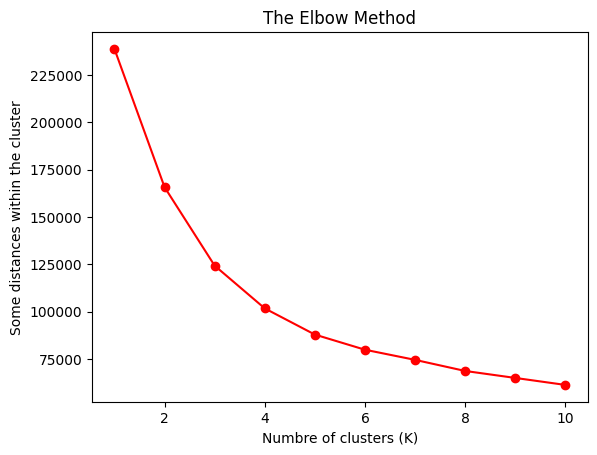

In [396]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_insurance_scaled)
    wcss.append(kmeans.inertia_)

# Tracer la méthode du coude pour aider à déterminer K
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Numbre of clusters (K)')
plt.ylabel('Some distances within the cluster')
plt.show()

## clusturing with K_means

In [397]:
k_value =  3
kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
insurance['Cluster'] = kmeans.fit_predict(data_insurance_scaled)

In [398]:
insurance.head()

,Seniority,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Weight,Cluster
0,4,80,599,7068.00,0,1,190,0
6,15,85,1229,16030.00,5,1,1105,2
10,3,6,74,1261.82,0,1,87,0
13,3,6,244,3000.00,0,1,92,0
15,13,87,1598,9927.00,4,1,1055,2


In [399]:
data= insurance

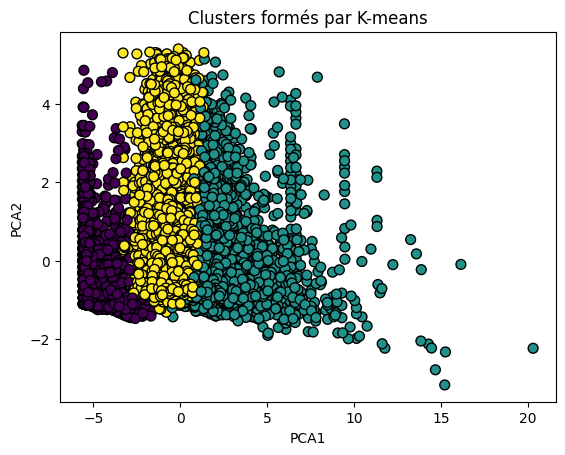

In [400]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_insurance_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

# Tracer les clusters
plt.scatter(data['PCA1'], data['PCA2'], c=data['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.title('Clusters formés par K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


### data analysis

/home/samir/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


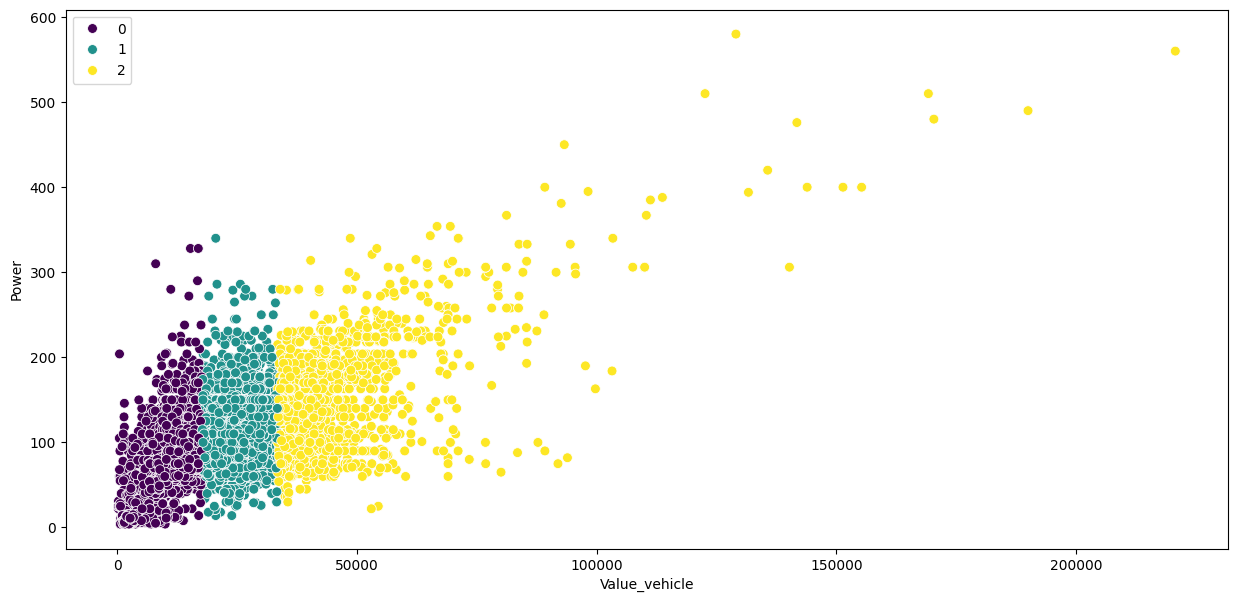

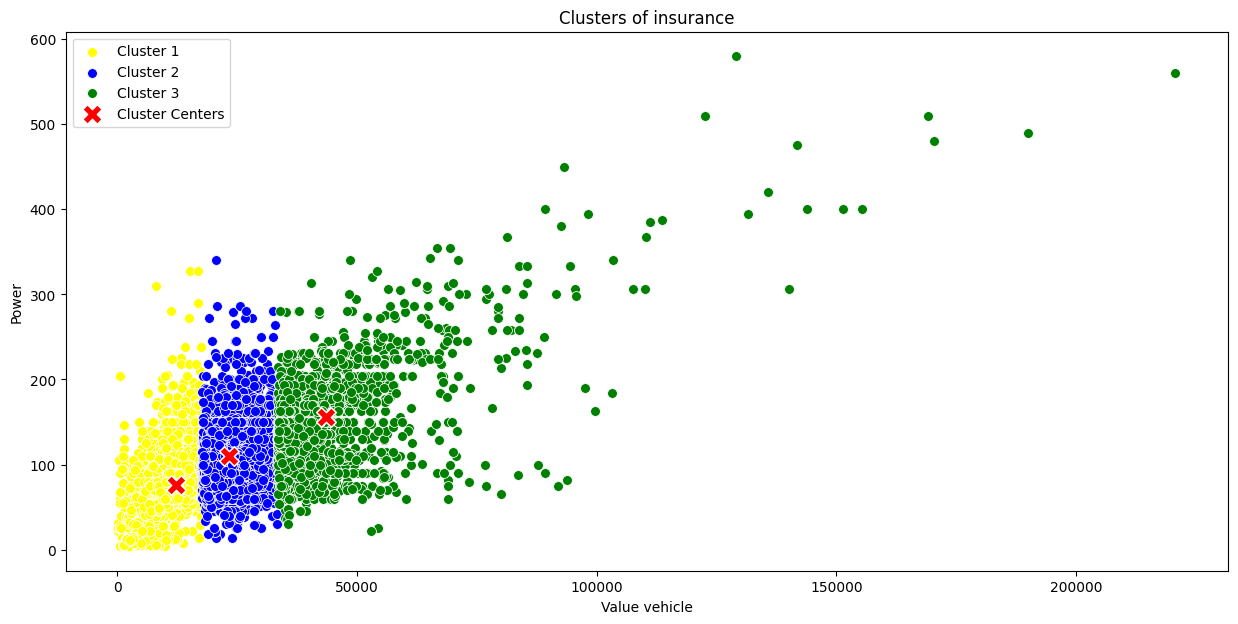

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'insurance' is your DataFrame
x1 = insurance[['Value_vehicle', 'Power']].values

# Applying KMeans with the chosen number of clusters (3 in this case)
kmeans1 = KMeans(n_clusters=k_value, init='k-means++', random_state=42)
y_kmeans1 = kmeans1.fit_predict(x)

# Visualizing the clusters
plt.figure(figsize=(15, 7))

# Scatter plot for data points colored by cluster
sns.scatterplot(x=insurance['Value_vehicle'], y=insurance['Power'], hue=y_kmeans1, palette="viridis", s=50)

# Scatter plot for centroids
plt.figure(figsize=(15,7))
sns.scatterplot(x=x1[y_kmeans1 == 0, 0], y=x1[y_kmeans1 == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=x1[y_kmeans1 == 1, 0], y=x1[y_kmeans1 == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=x1[y_kmeans1 == 2, 0], y=x1[y_kmeans1 == 2, 1], color='green', label='Cluster 3', s=50)
# sns.scatterplot(x=insurance.loc[y_kmeans == 3, 'Value_vehicle'], y=insurance.loc[y_kmeans == 3, 'Power'], color='orange', label='Cluster 4', s=50)
sns.scatterplot(x=kmeans1.cluster_centers_[:, 0], y=kmeans1.cluster_centers_[:, 1], color='red', label='Cluster Centers', marker='X', s=200)
plt.grid(False)
plt.title('Clusters of insurance')
plt.xlabel('Value vehicle')
plt.ylabel('Power')
plt.legend()
plt.show()

/home/samir/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


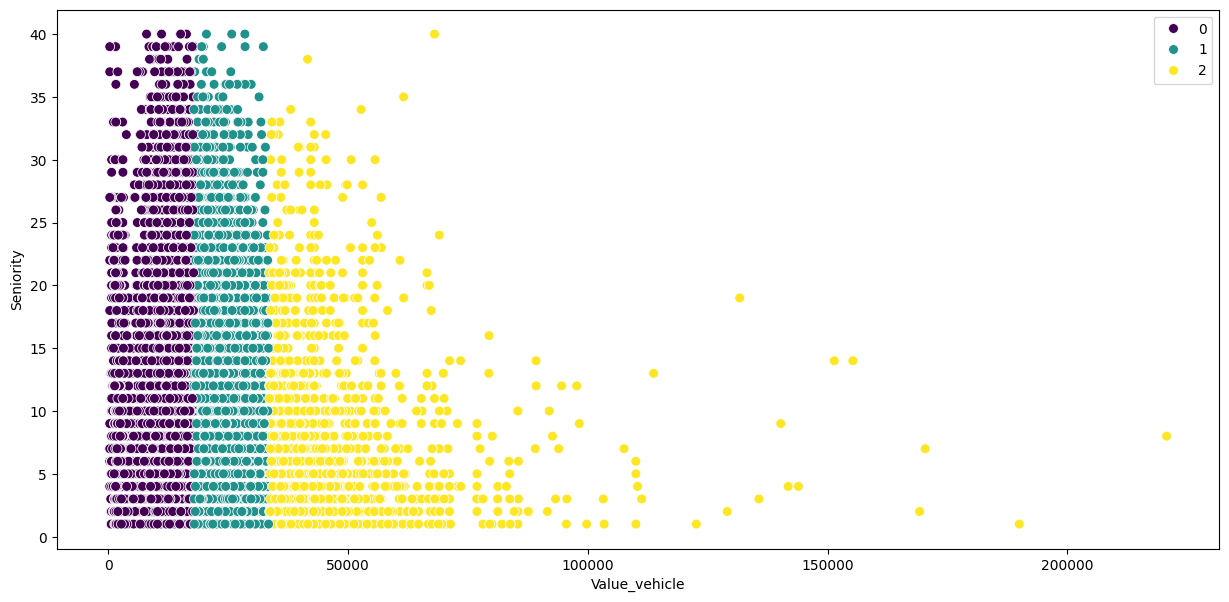

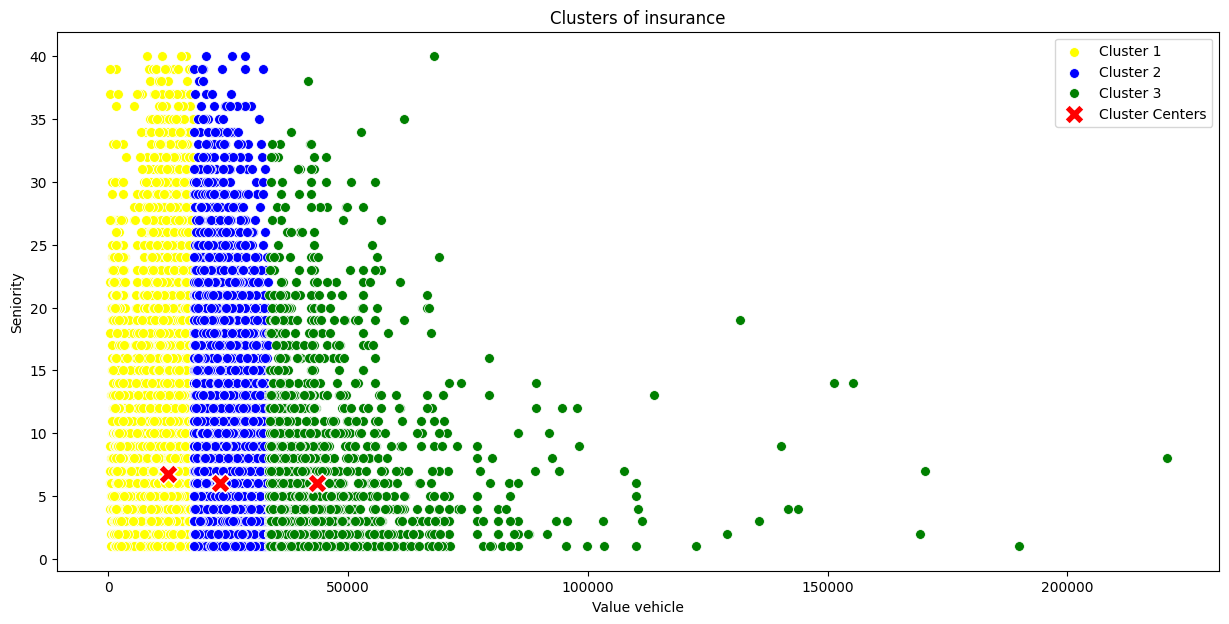

In [402]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'insurance' is your DataFrame
x2 = insurance[['Value_vehicle', 'Seniority']].values

# Define the number of clusters (replace with your desired number)
k_value = 3

# Applying KMeans with the chosen number of clusters
kmeans2 = KMeans(n_clusters=k_value, init='k-means++', random_state=42)
y_kmeans2 = kmeans2.fit_predict(x2)  # Use x2 instead of x

# Visualizing the clusters
plt.figure(figsize=(15, 7))

# Scatter plot for data points colored by cluster
sns.scatterplot(x=insurance['Value_vehicle'], y=insurance['Seniority'], hue=y_kmeans2, palette="viridis", s=50)

# Scatter plot for centroids
plt.figure(figsize=(15, 7))
sns.scatterplot(x=x2[y_kmeans2 == 0, 0], y=x2[y_kmeans2 == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=x2[y_kmeans2 == 1, 0], y=x2[y_kmeans2 == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=x2[y_kmeans2 == 2, 0], y=x2[y_kmeans2 == 2, 1], color='green', label='Cluster 3', s=50)

# Scatter plot for cluster centers
sns.scatterplot(x=kmeans2.cluster_centers_[:, 0], y=kmeans2.cluster_centers_[:, 1], color='red', label='Cluster Centers', marker='X', s=200)

plt.grid(False)
plt.title('Clusters of insurance')
plt.xlabel('Value vehicle')
plt.ylabel('Seniority')
plt.legend()
plt.show()


### EM Clusturing

In [403]:
from sklearn.mixture import GaussianMixture

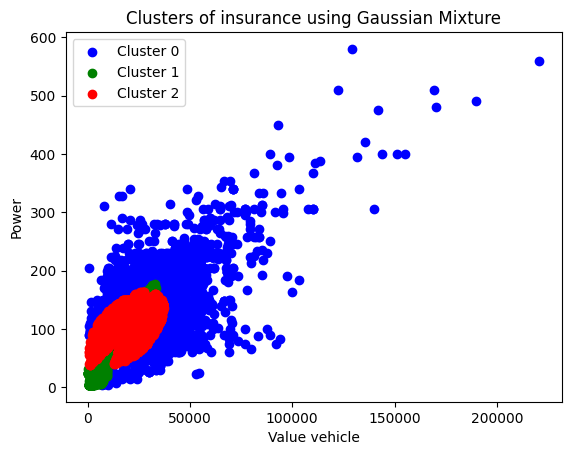

In [404]:


# Create and fit the Gaussian Mixture model
model = GaussianMixture(n_components=3, init_params='random')
model.fit(x)
yhat = model.predict(x)

frame = pd.DataFrame(x)
frame['cluster'] = yhat
frame.columns = ['Value_vehicle', 'Power', 'cluster']

# Scatter plot for each cluster
color = ['blue', 'green', 'red', 'black']
for k in range(3):  # Adjust based on the number of components
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Value_vehicle"], data["Power"], c=color[k], label=f'Cluster {k}')

plt.title('Clusters of insurance using Gaussian Mixture')
plt.xlabel('Value vehicle')
plt.ylabel('Power')
plt.legend()
plt.show()

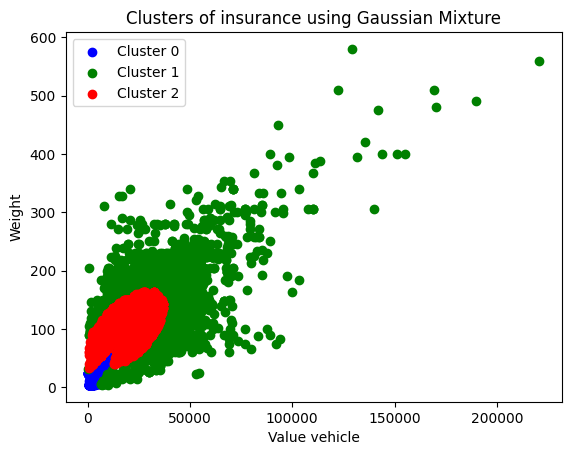

In [405]:

# Create and fit the Gaussian Mixture model
model = GaussianMixture(n_components=3, init_params='random')
model.fit(x)
yhat = model.predict(x)

frame = pd.DataFrame(x)
frame['cluster'] = yhat
frame.columns = ['Value_vehicle', 'Weight', 'cluster']

# Scatter plot for each cluster
color = ['blue', 'green', 'red', 'black']
for k in range(3):  # Adjust based on the number of components
    data = frame[frame["cluster"] == k]
    plt.scatter(data["Value_vehicle"], data["Weight"], c=color[k], label=f'Cluster {k}')

plt.title('Clusters of insurance using Gaussian Mixture')
plt.xlabel('Value vehicle')
plt.ylabel('Weight')
plt.legend()
plt.show()